In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
path = "./data/Norwich/"
shape_f = path + "shapefiles/E07000148.shp"
norwich = gpd.read_file(shape_f)

In [24]:
norwich.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lsoa11cd  83 non-null     object  
 1   geometry  83 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.4+ KB


In [25]:
#lsoa stands for lower layer super output area
norwich.head()

,lsoa11cd,geometry
0,E01026791,"POLYGON ((618360.527 309503.692, 618360.103 30..."
1,E01026792,"POLYGON ((617820.251 309252.089, 617820.121 30..."
2,E01026793,"POLYGON ((618822.898 309414.724, 618813.045 30..."
3,E01026794,"POLYGON ((616923.156 309617.352, 616918.668 30..."
4,E01026796,"POLYGON ((619264.507 309165.017, 619263.813 30..."


D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

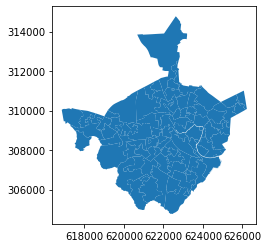

In [26]:
norwich.plot()

In [27]:
import pandas as pd

norwich_data = pd.read_csv(path + "tables/E07000148_QS102EW.csv") #population density
norwich_data.head()




D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lsoa11cd,date,lsoa11nm,Rural Urban,Area/Population Density: All usual residents; measures: Value,Area/Population Density: Area Hectares; measures: Value,Area/Population Density: Density (number of persons per hectare); measures: Value
0,E01026791,2011,Norwich 005A,Total,1475,20.52,71.9
1,E01026792,2011,Norwich 005B,Total,1445,35.61,40.6
2,E01026793,2011,Norwich 005C,Total,1817,29.22,62.2
3,E01026794,2011,Norwich 005D,Total,2065,75.62,27.3
4,E01026796,2011,Norwich 005F,Total,1643,37.28,44.1


In [28]:
norwich_merge = norwich.merge(norwich_data, on="lsoa11cd")
norwich_merge.head()

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lsoa11cd,geometry,date,lsoa11nm,Rural Urban,Area/Population Density: All usual residents; measures: Value,Area/Population Density: Area Hectares; measures: Value,Area/Population Density: Density (number of persons per hectare); measures: Value
0,E01026791,"POLYGON ((618360.527 309503.692, 618360.103 30...",2011,Norwich 005A,Total,1475,20.52,71.9
1,E01026792,"POLYGON ((617820.251 309252.089, 617820.121 30...",2011,Norwich 005B,Total,1445,35.61,40.6
2,E01026793,"POLYGON ((618822.898 309414.724, 618813.045 30...",2011,Norwich 005C,Total,1817,29.22,62.2
3,E01026794,"POLYGON ((616923.156 309617.352, 616918.668 30...",2011,Norwich 005D,Total,2065,75.62,27.3
4,E01026796,"POLYGON ((619264.507 309165.017, 619263.813 30...",2011,Norwich 005F,Total,1643,37.28,44.1


D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Area/Population Density: Density (number of persons per hectare); measures: Value', ylabel='Count'>

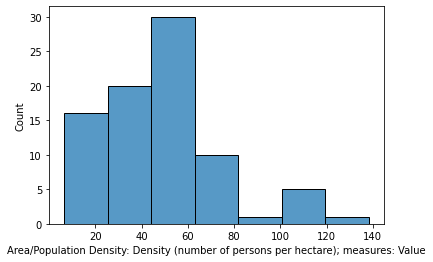

In [39]:
import seaborn

# we can look at the distribution of the Population Density across the zones in Norwich
seaborn.histplot(norwich_merge['Area/Population Density: Density (number of persons per hectare); measures: Value'], bins = 7)

In [38]:
norwich_merge['Area/Population Density: Density (number of persons per hectare); measures: Value'].describe()

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count     83.000000
mean      50.142169
std       26.641432
min        6.600000
25%       30.750000
50%       47.700000
75%       61.750000
max      138.200000
Name: Area/Population Density: Density (number of persons per hectare); measures: Value, dtype: float64

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No handles with labels found to put in legend.


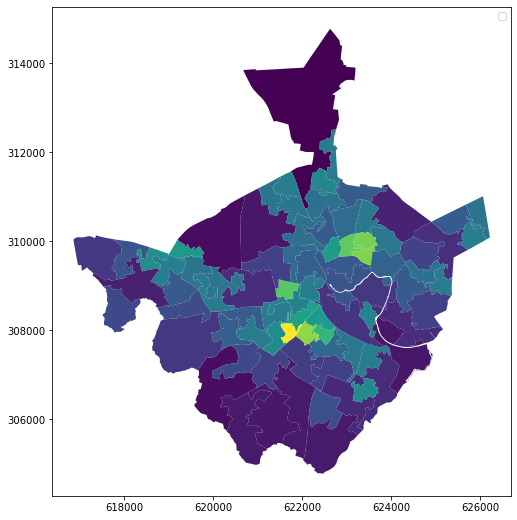

In [41]:
f, ax = plt.subplots(1, figsize=(9,9))

norwich_merge.plot(ax=ax, column='Area/Population Density: Density (number of persons per hectare); measures: Value')
ax.legend()

plt.show()

In [30]:
bikepaths = osmnx.graph_from_place("Norwich, UK", network_type="bike")

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
len(bikepaths)

11572

In [32]:

pubs = osmnx.geometries_from_place("Norwich, UK",tags={"amenity": "pub"})

In [33]:
pubs.head()

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,addr:city,addr:country,addr:postcode,addr:street,amenity,brand,fhrs:id,...,smoking,payment:discover_card,payment:mastercard,payment:visa,source:addr:housenumber,addr:unit,source:addr,ways,kitchen_hours,type
0,node/904071475,904071475,node,Norwich,GB,NR1 1DX,Prince of Wales Road,pub,Table Table,26652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/7816088209,7816088209,node,Norwich,GB,NR2 4AR,Saint Benedicts Street,pub,NaN,1287904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/71297069,71297069,way,Norwich,GB,NR4 7LD,Eaton Street,pub,NaN,24888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/71297151,71297151,way,Norwich,GB,NR4 7AB,Eaton Street,pub,Enterprise Inns,770694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/93447444,93447444,way,Norwich,GB,NR3 4DY,Sprowston Road,pub,NaN,67958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


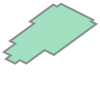